In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("tips.csv")
X = df["total_bill"]
Y = df["tip"]

In [4]:
def localRegression(X0, X, Y, tau):
    X0 = np.r_[1, X0]
    X = np.c_[np.ones(len(X)), X]
    xw = X.T * kernel(X0, X, tau)
    beta = np.linalg.pinv(xw@X)@xw@Y
    return X0@beta

In [5]:
def kernel(X0, X, tau):
    return np.exp(np.sum( (X-X0)**2 / (-2*tau**2), axis = 1)) 

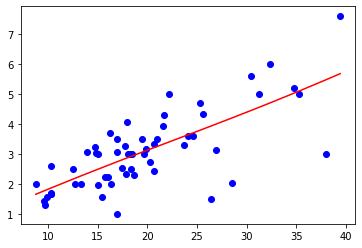

In [10]:
sortindex = X.argsort(0)
prediction = np.array([localRegression(X0, X, Y, 10) for X0 in X])
plt.scatter(X, Y, c = "blue")
plt.plot(X[sortindex], prediction[sortindex], c = "red")
plt.show()